In [17]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns

from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.patches import Patch

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 16})


### Read data.

In [18]:
# Read literature review data.

lit_review_data = pd.read_csv("Data/lit_review_data.csv")
lit_review_data = clean_columns(lit_review_data)
lit_review_data


,title,author,year,country,continent,response,response_category,response_type,local_factor,local_strategy,local_effect,radius,minimum_complexity,maximum_complexity,landscape_effect,interaction_effect
0,A macro-scale perspective on within-farm manag...,Amano et al.,2011,Japan,Asia,Spider abundance,Natural enemy,Biodiversity,Pesticide use,Intensity,Negative,250.0,NaN,NaN,Positive,NS
1,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,Cicada species richness,Arthropod,Biodiversity,"Flower field age (new, refreshed, continuous)",Floral,NS,1000.0,3.6,25.0,NS,NS
2,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,Orthopteran species richness,Arthropod,Biodiversity,"Flower field age (new, refreshed, continuous)",Floral,NS,1000.0,3.6,25.0,NS,NS
3,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,Bee species richness,Pollinator,Biodiversity,"Flower field age (new, refreshed, continuous)",Floral,NS,1000.0,3.6,25.0,Positive,NS
4,A multitaxa assessment of the effectiveness of...,Boetzel et al.,2021,Germany,Europe,Butterfly species richness,Pollinator,Biodiversity,"Flower field age (new, refreshed, continuous)",Floral,NS,1000.0,3.6,25.0,NS,NS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,Abundance (wood-nesting bees),Pollinator,Biodiversity,Organic,Intensity,NS,2000.0,3.0,64.0,NS,NS
577,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,Wild bee visitation,Pollinator,Ecosystem services,Local floral resources,Floral,NS,2000.0,3.0,64.0,NS,NS
578,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,Abundance (eusocial bees),Pollinator,Biodiversity,Local floral resources,Floral,NS,2000.0,3.0,64.0,NS,NS
579,Wild bee pollinators provide the majority of c...,Winfree et al.,2007,United States,North America,Abundance (solitary bees),Pollinator,Biodiversity,Local floral resources,Floral,Positive,2000.0,3.0,64.0,NS,NS


In [19]:
# Convert column data types.

lit_review_data[
    [
        "title",
        "author",
        "country",
        "continent",
        "response",
        "response_category",
        "local_factor",
        "local_strategy",
        "local_effect",
        "landscape_effect",
        "interaction_effect",
        "response_type",
    ]
] = lit_review_data.loc[
    :,
    [
        "title",
        "author",
        "country",
        "continent",
        "response",
        "response_category",
        "local_factor",
        "local_strategy",
        "local_effect",
        "landscape_effect",
        "interaction_effect",
        "response_type",
    ],
].astype(
    "category"
)


### Descriptive data for first results section.

In [20]:
# More descriptive data for first section of results - local strategy count.

lit_review_data.local_strategy.value_counts(ascending=True)


local_strategy
Structure     58
Diversity     73
Floral       139
Intensity    311
Name: count, dtype: int64

In [21]:
# More descriptive data for first section of results - response category count.

lit_review_data.response_category.value_counts(ascending=True)


response_category
Arthropod         32
Crop              69
Pest              74
Pollinator       120
Natural enemy    286
Name: count, dtype: int64

In [22]:
# More descriptive data for first section of results - response type count.

lit_review_data.response_type.value_counts(ascending=True)


response_type
Ecosystem services    227
Biodiversity          354
Name: count, dtype: int64

In [23]:
# Average radius of landscape complexity measurements.

lit_review_data["radius"].mean()


920.5436720142602

In [24]:
# SEM of radius of landscape complexity measurements.

lit_review_data['radius'].sem()


22.143201265841817

In [26]:
# Read landscape category data.

landscape_cat = pd.read_csv("Data/lit_review_landscape_percents.csv")
landscape_cat = clean_columns(landscape_cat)
landscape_cat


,title,author_s,year,simple_start,simple_end,int_start,int_end,complex_start,complex_end,metric,detail
0,Benefits of wildflower areas as overwintering ...,Hoffmann et al.,2021,0.0,2.00,3.00,4.00,5.00,7.00,Semi-natural habitats,permanent semi-natural habitats and transient ...
1,Testing scale-dependent effects of seminatural...,Dainese et al.,2015,1.0,3.00,4.00,19.00,20.00,30.00,Semi-natural habitat,NaN
2,The benefits of hedgerows for pollinators and ...,Garratt et al.,2017,0.0,4.71,4.72,9.88,9.89,41.97,Semi-natural habitat,NaN
3,Multi-scale effects of landscape complexity an...,Rusch et al.,2011,0.0,5.00,6.00,NaN,NaN,58.00,Semi-natural habitats,NaN
4,Pest control potential of adjacent agri-enviro...,Boetzel et al.,2020,3.6,5.00,6.00,19.00,20.00,31.60,Semi-natural habitat,NaN
...,...,...,...,...,...,...,...,...,...,...,...
121,Organic farming affects the biological control...,Birkhofer et al.,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Organic farming supports lower pest infestatio...,Torok et al.,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Scale-dependent environmental filtering of gro...,Ruzickova et al.,2020,NaN,20.00,NaN,NaN,21.00,NaN,Semi-natural habitat,NaN
124,"Sweep netting samples, but not sticky trap sam...",Bakker et al.,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Looking at landscape categories for each unique paper.

landscape_geog = landscape_cat.merge(lit_review_data, on="title")
landscape_geog = landscape_geog[
    [
        "simple_start",
        "simple_end",
        "int_start",
        "int_end",
        "complex_start",
        "complex_end",
        "continent",
    ]
].dropna()
landscape_geog


,simple_start,simple_end,int_start,int_end,complex_start,complex_end,continent
0,0.0,2.0,3.0,4.0,5.0,7.0,Europe
1,0.0,2.0,3.0,4.0,5.0,7.0,Europe
2,0.0,2.0,3.0,4.0,5.0,7.0,Europe
3,0.0,2.0,3.0,4.0,5.0,7.0,Europe
4,0.0,2.0,3.0,4.0,5.0,7.0,Europe
...,...,...,...,...,...,...,...
153,45.0,50.0,51.0,69.0,70.0,76.0,Africa
154,52.0,74.0,75.0,84.0,85.0,98.0,Australia
155,52.0,74.0,75.0,84.0,85.0,98.0,Australia
156,52.0,74.0,75.0,84.0,85.0,98.0,Australia


In [28]:
# Calculating average landscape category values.

landscape_geog["Simple"] = landscape_geog[["simple_start", "simple_end"]].mean(axis=1)
landscape_geog["Intermediate"] = landscape_geog[["int_start", "int_end"]].mean(axis=1)
landscape_geog["Complex"] = landscape_geog[["complex_start", "complex_end"]].mean(
    axis=1
)

landscape_geog


,simple_start,simple_end,int_start,int_end,complex_start,complex_end,continent,Simple,Intermediate,Complex
0,0.0,2.0,3.0,4.0,5.0,7.0,Europe,1.0,3.5,6.0
1,0.0,2.0,3.0,4.0,5.0,7.0,Europe,1.0,3.5,6.0
2,0.0,2.0,3.0,4.0,5.0,7.0,Europe,1.0,3.5,6.0
3,0.0,2.0,3.0,4.0,5.0,7.0,Europe,1.0,3.5,6.0
4,0.0,2.0,3.0,4.0,5.0,7.0,Europe,1.0,3.5,6.0
...,...,...,...,...,...,...,...,...,...,...
153,45.0,50.0,51.0,69.0,70.0,76.0,Africa,47.5,60.0,73.0
154,52.0,74.0,75.0,84.0,85.0,98.0,Australia,63.0,79.5,91.5
155,52.0,74.0,75.0,84.0,85.0,98.0,Australia,63.0,79.5,91.5
156,52.0,74.0,75.0,84.0,85.0,98.0,Australia,63.0,79.5,91.5


In [29]:
# Calculating regionally specific landscape categories.

landscape_europe = landscape_geog.loc[landscape_geog["continent"] == "Europe"][
    ["Simple", "Intermediate", "Complex"]
]
landscape_europe = pd.melt(landscape_europe)
landscape_europe["value"] = pd.to_numeric(landscape_europe["value"])
landscape_europe


,variable,value
0,Simple,1.0
1,Simple,1.0
2,Simple,1.0
3,Simple,1.0
4,Simple,1.0
...,...,...
253,Complex,67.5
254,Complex,67.5
255,Complex,58.5
256,Complex,58.5


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/1731631393.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/1731631393.py:18: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


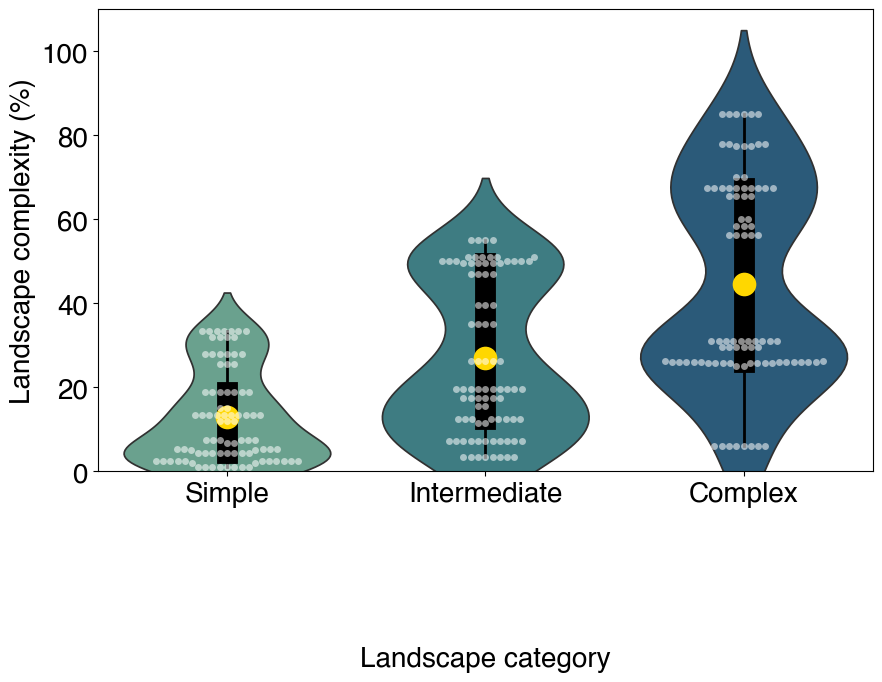

In [30]:
# Code for Figure 2b (Europe).

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})
plt.figure(figsize=(10, 6))

landscape_europe = landscape_europe.dropna()

sns.violinplot(
    x="variable",
    y="value",
    data=landscape_europe,
    inner="box",
    inner_kws=dict(box_width=15, whis_width=2, color="black", marker=None),
    palette="crest",
)
sns.swarmplot(x="variable", y="value", data=landscape_europe, color="1", alpha=0.55)
sns.pointplot(
    x="variable",
    y="value",
    data=landscape_europe,
    estimator="mean",
    errorbar=None,
    join=False,
    color="gold",
    markersize=15,
)

plt.xlabel("Landscape category", labelpad=100)
plt.ylabel("Landscape complexity (%)")
plt.ylim(0, 110)

plt.show()


In [31]:
# One-way ANOVA for European landscape categories.

group1 = landscape_europe.loc[landscape_europe["variable"] == "Simple"][
    "value"
].dropna()
group2 = landscape_europe.loc[landscape_europe["variable"] == "Intermediate"][
    "value"
].dropna()
group3 = landscape_europe.loc[landscape_europe["variable"] == "Complex"][
    "value"
].dropna()

f_oneway(group1, group2, group3)


F_onewayResult(statistic=62.29882286929887, pvalue=9.335239093246308e-23)

In [32]:
# Mean and SEM for European landscape categories.

landscape_europe.groupby("variable").agg(["mean", "sem"])


value          
                   mean       sem
variable                         
Complex       44.625814  2.634947
Intermediate  26.898837  1.952823
Simple        12.889884  1.193343

In [33]:
# Repeat above for North America (mostly US data).

landscape_us = landscape_geog.loc[landscape_geog["continent"] == "North America"][
    ["Simple", "Intermediate", "Complex"]
]
landscape_us = pd.melt(landscape_us)

landscape_us["value"] = pd.to_numeric(landscape_us["value"])

landscape_us


,variable,value
0,Simple,4.0
1,Simple,4.0
2,Simple,4.0
3,Simple,4.0
4,Simple,4.0
...,...,...
121,Complex,71.0
122,Complex,71.0
123,Complex,87.5
124,Complex,87.5


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/3511101715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/3511101715.py:18: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


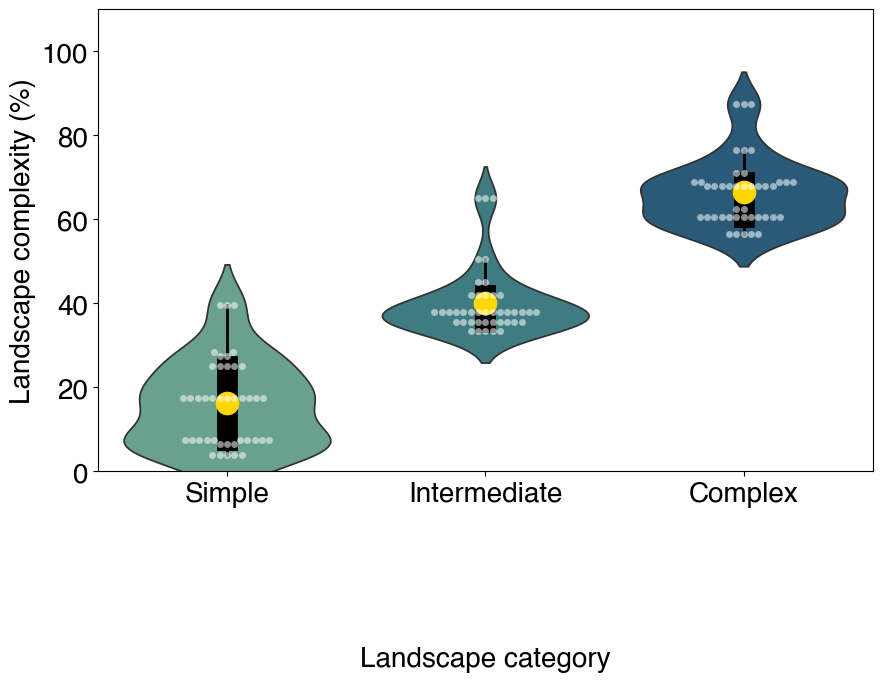

In [34]:
# Code for Figure 2c (North America).

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})
plt.figure(figsize=(10, 6))

landscape_us = landscape_us.dropna()

sns.violinplot(
    x="variable",
    y="value",
    data=landscape_us,
    inner="box",
    inner_kws=dict(box_width=15, whis_width=2, color="black", marker=None),
    palette="crest",
)
sns.swarmplot(x="variable", y="value", data=landscape_us, color="1", alpha=0.55)
sns.pointplot(
    x="variable",
    y="value",
    data=landscape_us,
    estimator="mean",
    errorbar=None,
    join=False,
    color="gold",
    markersize=15,
)

plt.xlabel("Landscape category", labelpad=100)
plt.ylabel("Landscape complexity (%)")
plt.ylim(0, 110)
plt.show()


In [35]:
# One-way ANOVA for North American landscape categories.

group1 = landscape_us.loc[landscape_us["variable"] == "Simple"]["value"].dropna()
group2 = landscape_us.loc[landscape_us["variable"] == "Intermediate"]["value"].dropna()
group3 = landscape_us.loc[landscape_us["variable"] == "Complex"]["value"].dropna()

f_oneway(group1, group2, group3)


F_onewayResult(statistic=337.1950674352505, pvalue=1.1923577091149008e-50)

In [36]:
# Mean and SEM for North American landscape categories.

landscape_us.groupby("variable").agg(["mean", "sem"])


value          
                   mean       sem
variable                         
Complex       66.488095  1.247819
Intermediate  40.202381  1.237605
Simple        16.190476  1.594393

Getting start and end, average value, and SEM of each landscape category for all papers.

In [37]:
simple_start = np.average(landscape_cat["simple_start"].dropna())
simple_start


10.21517857142857

In [38]:
simple_start_se = np.std(landscape_cat["simple_start"].dropna())
simple_start_se


14.60375850485457

In [39]:
simple_end = np.average(landscape_cat["simple_end"].dropna())
simple_end


21.874615384615385

In [40]:
simple_end_se = np.std(landscape_cat["simple_end"].dropna())
simple_end_se


16.255343081529375

In [41]:
int_start = np.average(landscape_cat["int_start"].dropna())
int_start


22.699142857142856

In [42]:
int_start_se = np.std(landscape_cat["int_start"].dropna())
int_start_se


17.3873458701483

In [43]:
int_end = np.average(landscape_cat["int_end"].dropna())
int_end


45.29625

In [44]:
int_end_se = np.std(landscape_cat["int_end"].dropna())
int_end_se


21.26733553921365

In [45]:
complex_start = np.average(landscape_cat["complex_start"].dropna())
complex_start


43.39702702702703

In [46]:
complex_start_se = np.std(landscape_cat["complex_start"].dropna())
complex_start_se


21.196225934447256

In [47]:
complex_end = np.average(landscape_cat["complex_end"].dropna())
complex_end


60.67327272727273

In [48]:
complex_end_se = np.std(landscape_cat["complex_end"].dropna())
complex_end_se


24.33871189200413

In [49]:
cat_df = landscape_cat[
    [
        "simple_start",
        "simple_end",
        "int_start",
        "int_end",
        "complex_start",
        "complex_end",
    ]
]
cat_df


,simple_start,simple_end,int_start,int_end,complex_start,complex_end
0,0.0,2.00,3.00,4.00,5.00,7.00
1,1.0,3.00,4.00,19.00,20.00,30.00
2,0.0,4.71,4.72,9.88,9.89,41.97
3,0.0,5.00,6.00,NaN,NaN,58.00
4,3.6,5.00,6.00,19.00,20.00,31.60
...,...,...,...,...,...,...
121,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,20.00,NaN,NaN,21.00,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
cat_df["Simple"] = cat_df[["simple_start", "simple_end"]].mean(axis=1)
cat_df["Intermediate"] = cat_df[["int_start", "int_end"]].mean(axis=1)
cat_df["Complex"] = cat_df[["complex_start", "complex_end"]].mean(axis=1)

cat_df


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/882541394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["Simple"] = cat_df[["simple_start", "simple_end"]].mean(axis=1)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/882541394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["Intermediate"] = cat_df[["int_start", "int_end"]].mean(axis=1)
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/882541394.py:3: SettingWithCopyWarning: 
A value is

,simple_start,simple_end,int_start,int_end,complex_start,complex_end,Simple,Intermediate,Complex
0,0.0,2.00,3.00,4.00,5.00,7.00,1.000,3.5,6.00
1,1.0,3.00,4.00,19.00,20.00,30.00,2.000,11.5,25.00
2,0.0,4.71,4.72,9.88,9.89,41.97,2.355,7.3,25.93
3,0.0,5.00,6.00,NaN,NaN,58.00,2.500,6.0,58.00
4,3.6,5.00,6.00,19.00,20.00,31.60,4.300,12.5,25.80
...,...,...,...,...,...,...,...,...,...
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,20.00,NaN,NaN,21.00,NaN,20.000,NaN,21.00
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
cat_df = cat_df[["Simple", "Intermediate", "Complex"]]
cat_df = pd.melt(cat_df)

cat_df


,variable,value
0,Simple,1.000
1,Simple,2.000
2,Simple,2.355
3,Simple,2.500
4,Simple,4.300
...,...,...
373,Complex,NaN
374,Complex,NaN
375,Complex,21.000
376,Complex,NaN


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/3378980963.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/3378980963.py:18: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


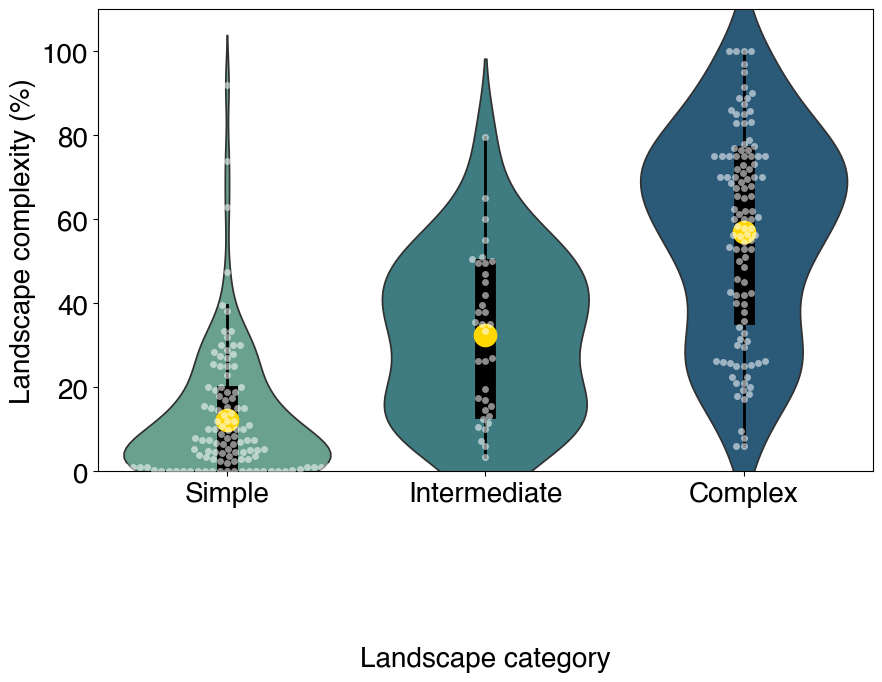

In [52]:
# Code for Figure 2a (landscape data for all papers combined).

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})
plt.figure(figsize=(10, 6))

cat_df = cat_df.dropna()

sns.violinplot(
    x="variable",
    y="value",
    data=cat_df,
    inner="box",
    inner_kws=dict(box_width=15, whis_width=2, color="black", marker=None),
    palette="crest",
)
sns.swarmplot(x="variable", y="value", data=cat_df, color="1", alpha=0.55)
sns.pointplot(
    x="variable",
    y="value",
    data=cat_df,
    estimator="mean",
    errorbar=None,
    join=False,
    color="gold",
    markersize=15,
)


plt.xlabel("Landscape category", labelpad=100)
plt.ylabel("Landscape complexity (%)")
plt.ylim(0, 110)

plt.show()


In [53]:
# One-way ANOVA for all landscape data.

group1 = cat_df.loc[cat_df["variable"] == "Simple"]["value"].dropna()
group2 = cat_df.loc[cat_df["variable"] == "Intermediate"]["value"].dropna()
group3 = cat_df.loc[cat_df["variable"] == "Complex"]["value"].dropna()

f_oneway(group1, group2, group3)


F_onewayResult(statistic=138.73483981233232, pvalue=1.3749645290350455e-41)

In [54]:
cat_df = cat_df.dropna()


In [55]:
# Tukey's HSD to make pair-wise comparisons for all landscape data.

print(stats.tukey_hsd(group1, group2, group3))


Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    -20.219     0.000   -29.422   -11.017
 (0 - 2)    -44.793     0.000   -51.136   -38.450
 (1 - 0)     20.219     0.000    11.017    29.422
 (1 - 2)    -24.574     0.000   -33.786   -15.362
 (2 - 0)     44.793     0.000    38.450    51.136
 (2 - 1)     24.574     0.000    15.362    33.786



In [56]:
stats.tukey_hsd(group1, group2, group3).pvalue


array([[1.00000000e+00, 1.34401706e-06, 0.00000000e+00],
       [1.34401706e-06, 1.00000000e+00, 4.10450030e-09],
       [0.00000000e+00, 4.10450030e-09, 1.00000000e+00]])

In [57]:
# Calculating mean and SEM of landscape categories.

cat_df.groupby("variable").agg(["mean", "sem"])


value          
                   mean       sem
variable                         
Complex       57.046964  2.302824
Intermediate  32.472857  3.228720
Simple        12.253717  1.442172

## Code for Figure 1.

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/2794725182.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["local_strategy"])[["local_effect"]]


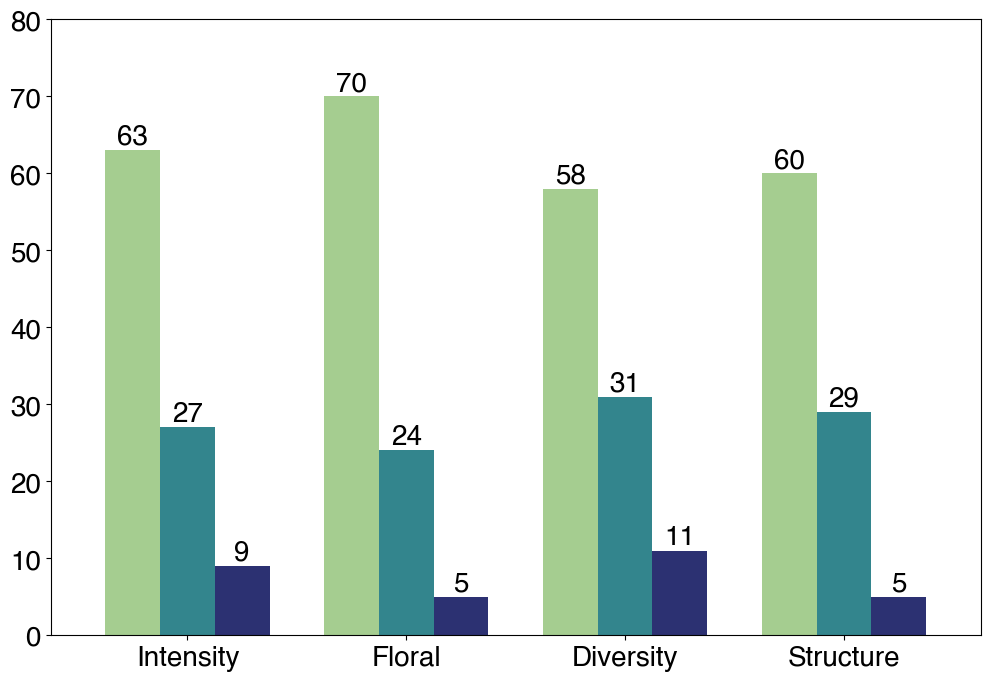

In [58]:
# Plotting local effects of local practices - Figure 1c.

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})

ax1 = (
    lit_review_data.groupby(["local_strategy"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(0)
    .unstack()[["NS", "Positive", "Negative"]]
    .loc[["Intensity", "Floral", "Diversity", "Structure"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        rot=0,
        figsize=(12, 8),
    )
)

for container in ax1.containers:
    ax1.bar_label(container, fontsize=20, fmt="%d")

plt.xlabel(None)
plt.ylim(0, 80)
ax1.get_legend().remove()


In [59]:
# Calculate percent observations for each category.

strategy_local_effect = (
    lit_review_data.groupby(["local_strategy"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .T
)

strategy_local_effect


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/1654373983.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["local_strategy"])[["local_effect"]]


local_strategy,Diversity,Floral,Intensity,Structure
local_effect,,,,
NS,58.3,69.8,63.3,60.3
Positive,30.6,24.5,27.3,29.3
Negative,11.1,5.0,9.3,5.2


In [60]:
# Chi-squared test for local management practices. 

stats.chisquare(strategy_local_effect)


Power_divergenceResult(statistic=array([33.7538    , 66.78126888, 45.40540541, 48.28924051]), pvalue=array([4.68225927e-08, 3.15233029e-15, 1.38147011e-10, 3.26681587e-11]))

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/2733764019.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["local_strategy"])[["landscape_effect"]]


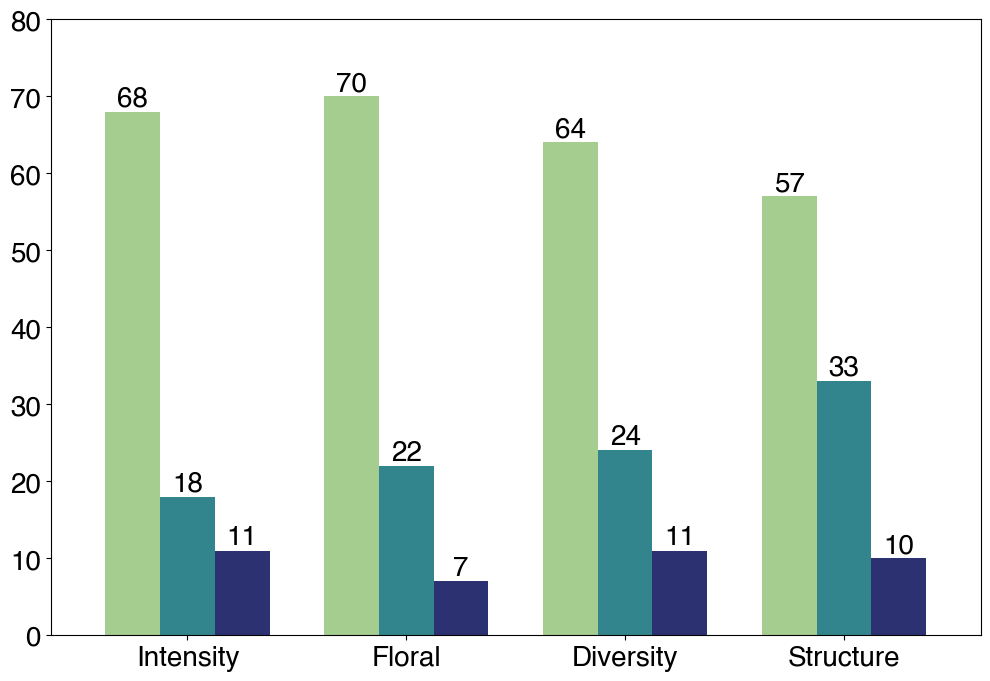

In [61]:
# Plotting effects of local practices across landscape gradients - Figure 1d.

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})

ax2 = (
    lit_review_data.groupby(["local_strategy"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(0)
    .unstack()[["NS", "Positive", "Negative"]]
    .loc[["Intensity", "Floral", "Diversity", "Structure"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        rot=0,
        figsize=(12, 8),
    )
)

for container in ax2.containers:
    ax2.bar_label(container, fontsize=20, fmt="%d")

plt.xlabel(None)
plt.ylim(0, 80)
ax2.get_legend().remove()


In [62]:
# Calculate percent observations for each landscape effect.

strategy_landscape_effect = (
    lit_review_data.groupby(["local_strategy"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .T
)

strategy_landscape_effect


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/737151705.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["local_strategy"])[["landscape_effect"]]


local_strategy,Diversity,Floral,Intensity,Structure
landscape_effect,,,,
NS,64.3,70.1,67.5,56.9
Positive,24.3,22.4,17.7,32.8
Negative,11.4,7.5,10.6,10.3


In [63]:
# Chi-squared test for landscape effects, subset by local management practice - Table 2.

stats.chisquare(strategy_landscape_effect)


Power_divergenceResult(statistic=array([45.6482    , 64.1606    , 60.20939457, 32.5862    ]), pvalue=array([1.22354322e-10, 1.16869916e-14, 8.42744815e-14, 8.39453370e-08]))

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/961397633.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["response_category"])[["local_effect"]]


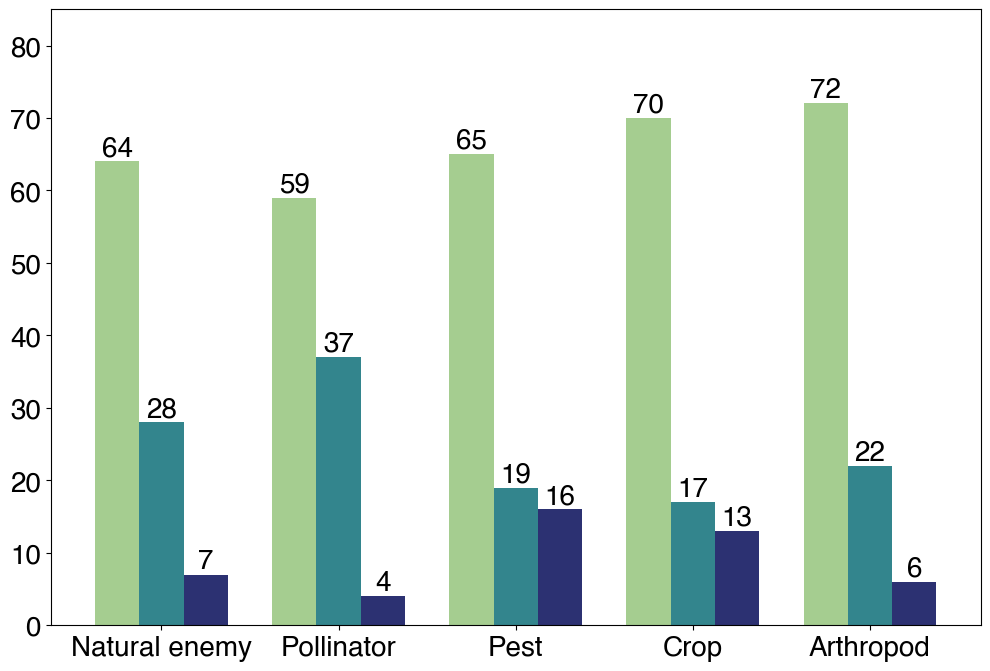

In [64]:
# Plotting effects of local practices for different response types - Figure 1e.

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})

ax3 = (
    lit_review_data.groupby(["response_category"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(0)
    .unstack()[["NS", "Positive", "Negative"]]
    .loc[["Natural enemy", "Pollinator", "Pest", "Crop", "Arthropod"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        rot=0,
        figsize=(12, 8),
    )
)

for container in ax3.containers:
    ax3.bar_label(container, fontsize=20, fmt="%d")

plt.xlabel(None)
plt.ylim(0, 85)
ax3.get_legend().remove()


In [65]:
response_local_effect = (
    lit_review_data.groupby(["response_category"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
).T

response_local_effect


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/405427070.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["response_category"])[["local_effect"]]


response_category,Arthropod,Crop,Natural enemy,Pest,Pollinator
local_effect,,,,,
NS,71.9,69.6,63.5,64.9,59.2
Positive,21.9,17.4,28.4,18.9,36.7
Negative,6.2,13.0,6.7,16.2,4.2


In [66]:
# Chi-squared test for response category, subset by local management practice - Table 2.

stats.chisquare(response_local_effect)


Power_divergenceResult(statistic=array([70.6298    , 59.4776    , 49.99127789, 44.9498    , 45.82917083]), pvalue=array([4.60186423e-16, 1.21507549e-13, 1.39486422e-11, 1.73490200e-10,
       1.11769163e-10]))

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/2849752956.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["response_category"])[["landscape_effect"]]


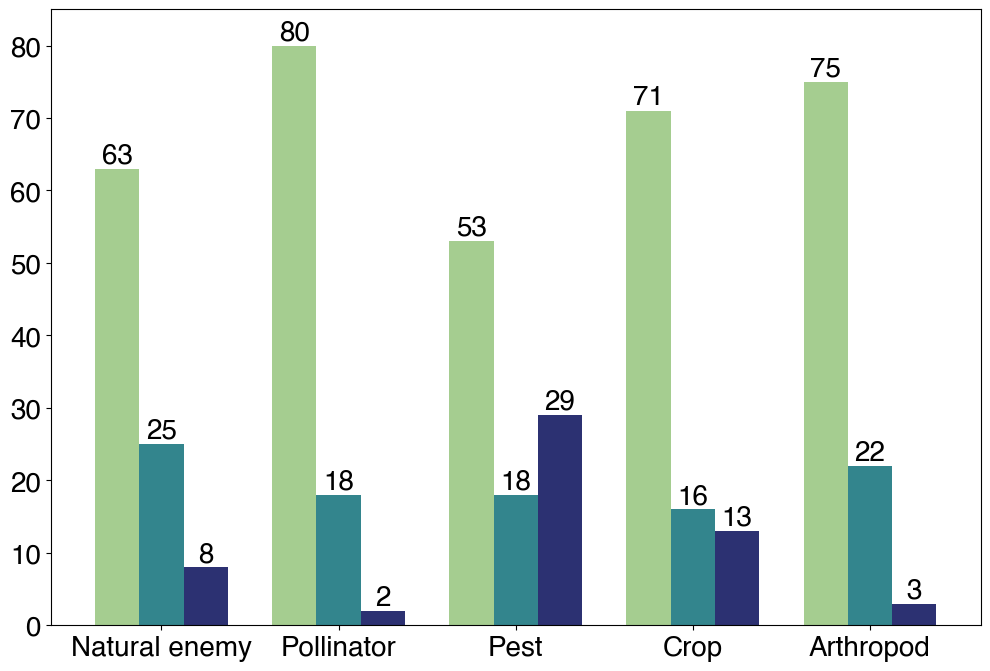

In [67]:
# Plotting effects of local practices across landscape gradients for different response types - Figure 1f.

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})

ax3 = (
    lit_review_data.groupby(["response_category"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(0)
    .unstack()[["NS", "Positive", "Negative"]]
    .loc[["Natural enemy", "Pollinator", "Pest", "Crop", "Arthropod"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        rot=0,
        figsize=(12, 8),
    )
)

for container in ax3.containers:
    ax3.bar_label(container, fontsize=20, fmt="%d")

plt.xlabel(None)
plt.ylim(0, 85)
ax3.get_legend().remove()


In [68]:
response_landscape_effect = (
    lit_review_data.groupby(["response_category"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .T
)

response_landscape_effect


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/3477178401.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["response_category"])[["landscape_effect"]]


response_category,Arthropod,Crop,Natural enemy,Pest,Pollinator
landscape_effect,,,,,
NS,75.0,70.6,62.6,52.8,80.0
Positive,21.9,16.2,24.6,18.1,17.5
Negative,3.1,13.2,8.2,29.2,2.5


In [69]:
# Chi-squared test for landscape effect, subset by response category - Table 2. 

stats.chisquare(response_landscape_effect)


Power_divergenceResult(statistic=array([ 83.4266    ,  62.6312    ,  48.97610063,  18.82377622,
       101.375     ]), pvalue=array([7.65850478e-19, 2.51077458e-14, 2.31726059e-11, 8.17464551e-05,
       9.69836330e-23]))

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/4151574744.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["response_type"])[["local_effect"]]


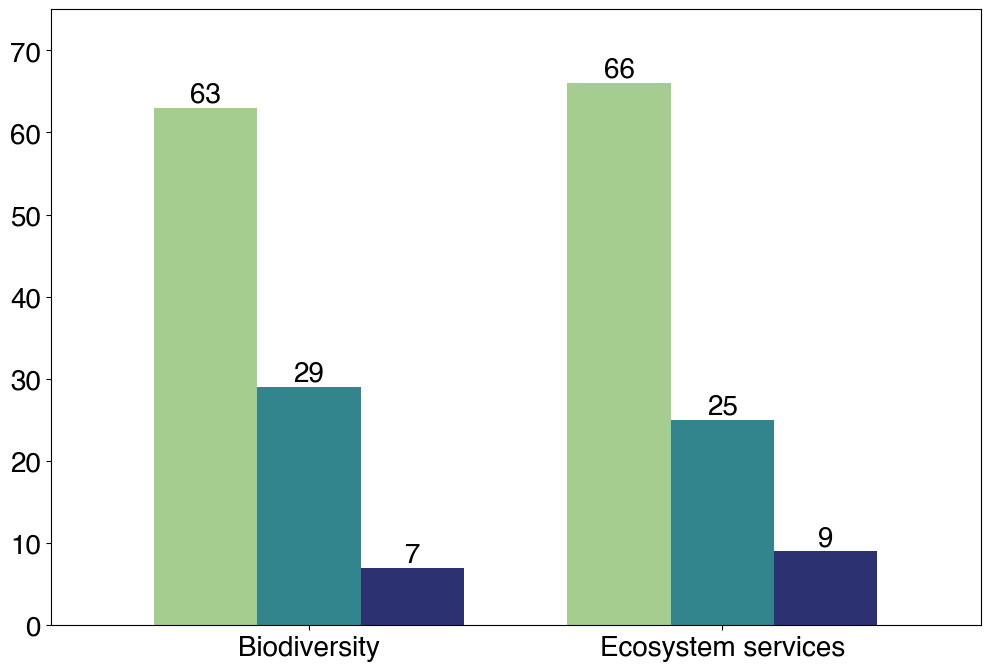

In [70]:
# Plotting local effects of local practices - Figure 1a.

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})

ax9 = (
    lit_review_data.groupby(["response_type"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(0)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        rot=0,
        figsize=(12, 8),
    )
)

plt.xlabel(None)
plt.ylim(0, 75)

for container in ax9.containers:
    ax9.bar_label(container, fontsize=20, fmt="%d")

ax9.get_legend().remove()


In [71]:
response_type_local_effect = (
    lit_review_data.groupby(["response_type"])[["local_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .T
)

response_type_local_effect


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/349916885.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["response_type"])[["local_effect"]]


response_type,Biodiversity,Ecosystem services
local_effect,,
NS,62.7,65.9
Positive,28.8,24.8
Negative,7.3,9.3


In [72]:
# Chi-squared test for response type, subset by local management - Table 2. 

stats.chisquare(response_type_local_effect)


Power_divergenceResult(statistic=array([47.37469636, 51.3302    ]), pvalue=array([5.16078059e-11, 7.14148770e-12]))

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/1446976483.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["response_type"])[["landscape_effect"]]


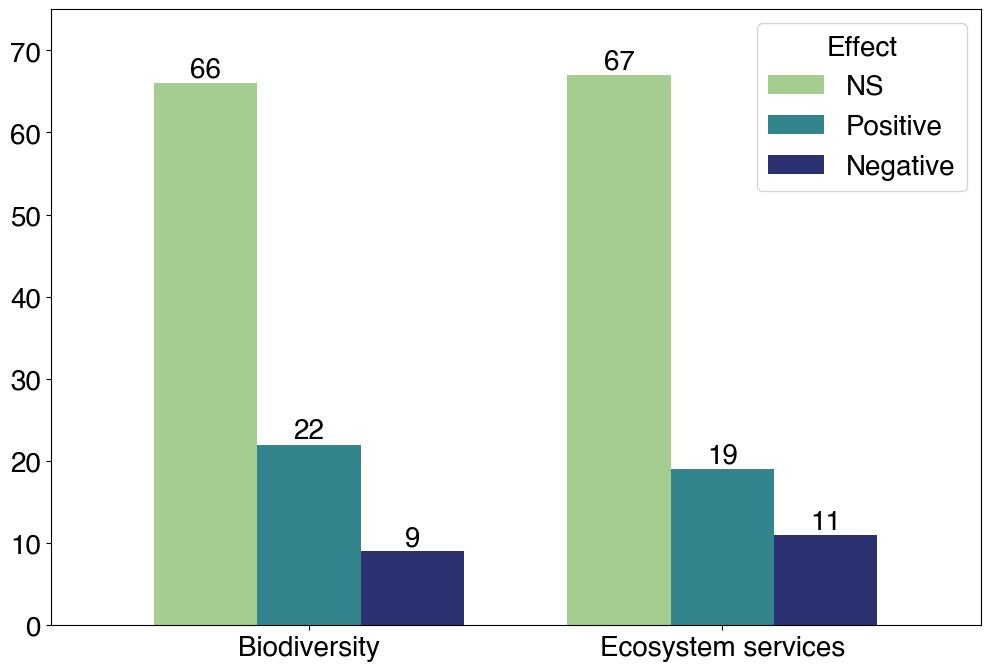

In [73]:
# Plotting local effects of local practices - Figure 1b.

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})

ax10 = (
    lit_review_data.groupby(["response_type"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(0)
    .unstack()[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        width=0.75,
        colormap="crest",
        rot=0,
        figsize=(12, 8),
    )
)

plt.xlabel(None)
plt.ylim(0, 75)

for container in ax10.containers:
    ax10.bar_label(container, fontsize=20, fmt="%d")

ax10.xaxis.labelpad = 100

ax10.legend(title="Effect")


In [74]:
response_type_landscape_effect = (
    lit_review_data.groupby(["response_type"])[["landscape_effect"]]
    .value_counts(normalize=True)
    .mul(100)
    .round(1)
    .unstack()[["NS", "Positive", "Negative"]]
    .T
)

response_type_landscape_effect


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_38889/523440140.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lit_review_data.groupby(["response_type"])[["landscape_effect"]]


response_type,Biodiversity,Ecosystem services
landscape_effect,,
NS,66.4,67.1
Positive,22.4,19.1
Negative,9.2,11.1


In [75]:
# Chi-squared test for response type, subset by landscape category - Table 2. 

stats.chisquare(response_type_landscape_effect)


Power_divergenceResult(statistic=array([54.91918367, 56.56731757]), pvalue=array([1.18700019e-12, 5.20670606e-13]))

In [76]:
# Calculate landscape complexity ranges.

lit_review_data.insert(
    loc=14,
    column="gradient_range",
    value=lit_review_data["maximum_complexity"] - lit_review_data["minimum_complexity"],
)


Text(0, 0.5, 'Number of observations')

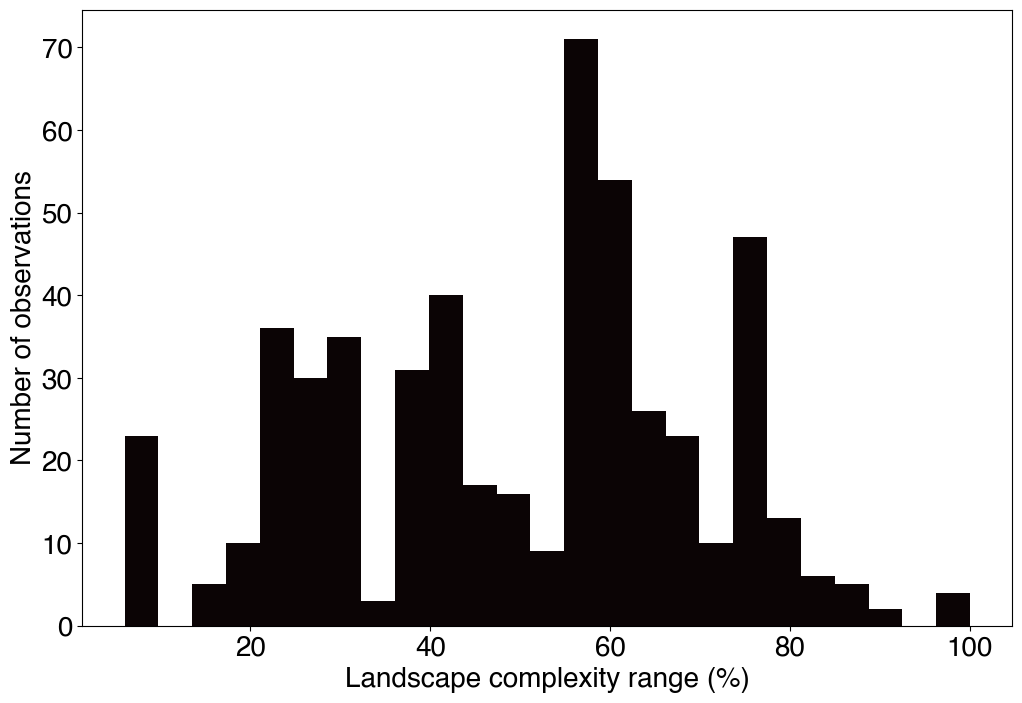

In [77]:
# Supporting information. 

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})

plt.figure(figsize=(12, 8))
# plt.title("Distribution of landscape complexity ranges")

plt.hist(lit_review_data["gradient_range"], alpha=1, bins=25, color="#0B0405")

plt.xlabel("Landscape complexity range (%)")
plt.ylabel("Number of observations")


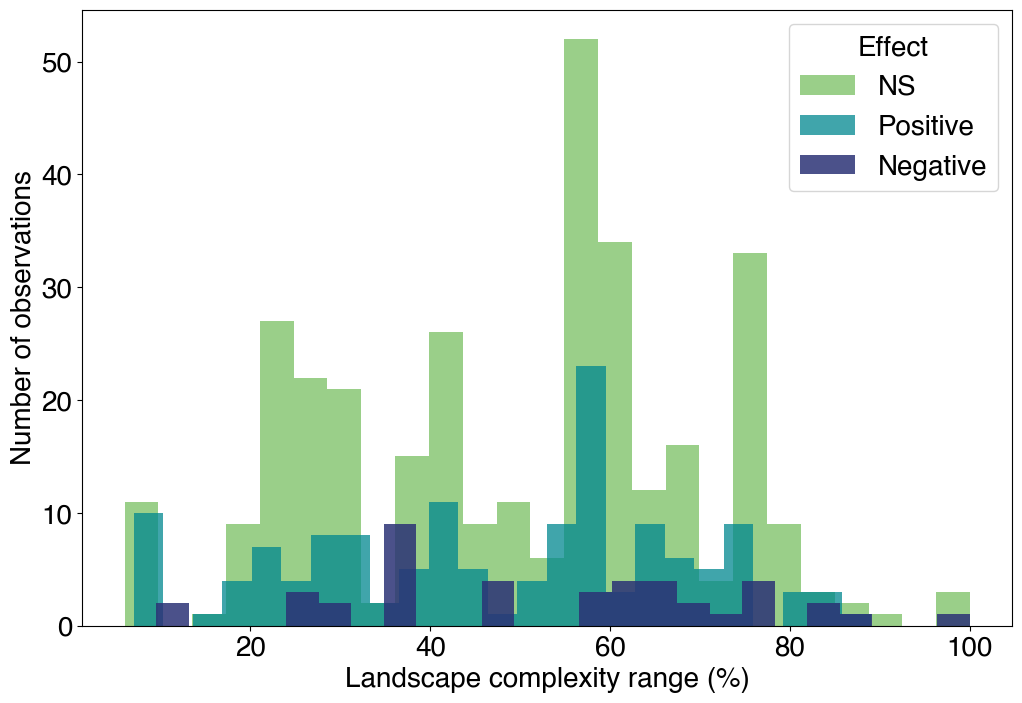

In [78]:
# Gradient ranges for local effect observations - Supporting Information Figure S1a.

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 20})

plt.figure(figsize=(12, 8))
# plt.title("Landscape Complexity Ranges for Local Effect Observations")

plt.hist(
    lit_review_data.where(lit_review_data["local_effect"] == "NS")["gradient_range"],
    alpha=1,
    label="NS",
    bins=25,
    color="#9ACF89",
)

plt.hist(
    lit_review_data.where(lit_review_data["local_effect"] == "Positive")[
        "gradient_range"
    ],
    alpha=0.75,
    label="Positive",
    bins=25,
    color="#00878F",
)

plt.hist(
    lit_review_data.where(lit_review_data["local_effect"] == "Negative")[
        "gradient_range"
    ],
    alpha=0.85,
    label="Negative",
    bins=25,
    color="#2B3276",
)

plt.legend(title="Effect", loc="upper right")
plt.xlabel("Landscape complexity range (%)")
plt.ylabel("Number of observations")
plt.show()


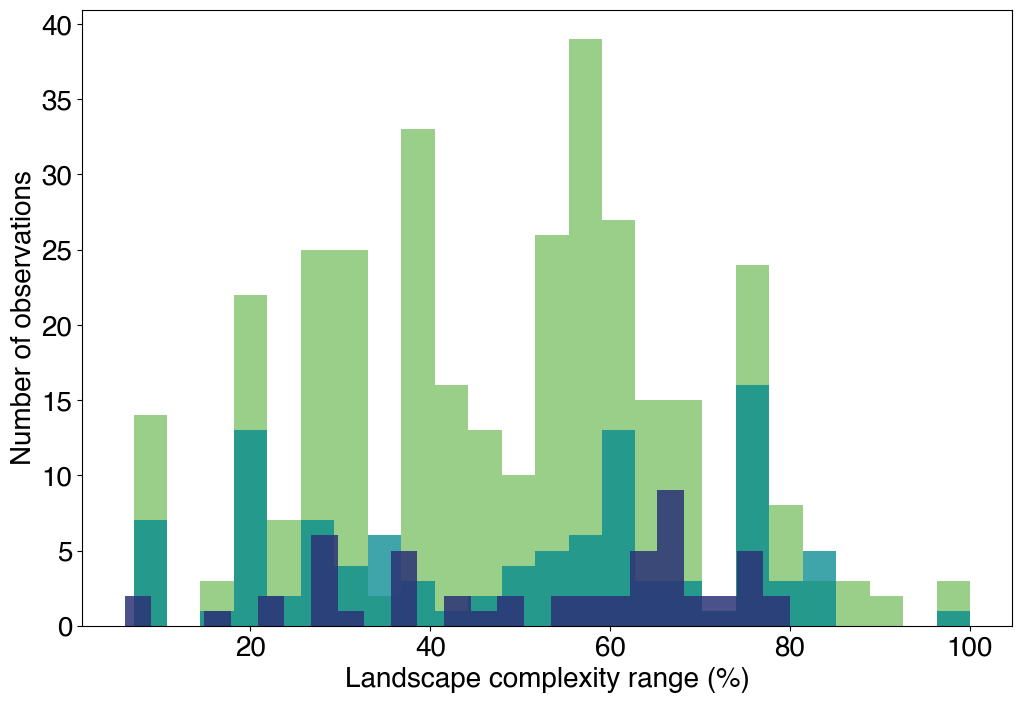

In [79]:
# Gradient ranges for landscape complexity effect observations - Supporting Information Figure S1b.

plt.figure(figsize=(12, 8))
# plt.title("Landscape Complexity Ranges for Landscape Complexity Effect Observations")

plt.hist(
    lit_review_data.where(lit_review_data["landscape_effect"] == "NS")[
        "gradient_range"
    ],
    alpha=1,
    label="NS",
    bins=25,
    color="#9ACF89",
)

plt.hist(
    lit_review_data.where(lit_review_data["landscape_effect"] == "Positive")[
        "gradient_range"
    ],
    alpha=0.75,
    label="Positive",
    bins=25,
    color="#00878F",
)

plt.hist(
    lit_review_data.where(lit_review_data["landscape_effect"] == "Negative")[
        "gradient_range"
    ],
    alpha=0.85,
    label="Negative",
    bins=25,
    color="#2B3276",
)

# plt.legend(title="Effect", loc="upper right")
plt.xlabel("Landscape complexity range (%)")
plt.ylabel("Number of observations")
plt.show()


/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/matplotlib/axes/_axes.py:6827: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

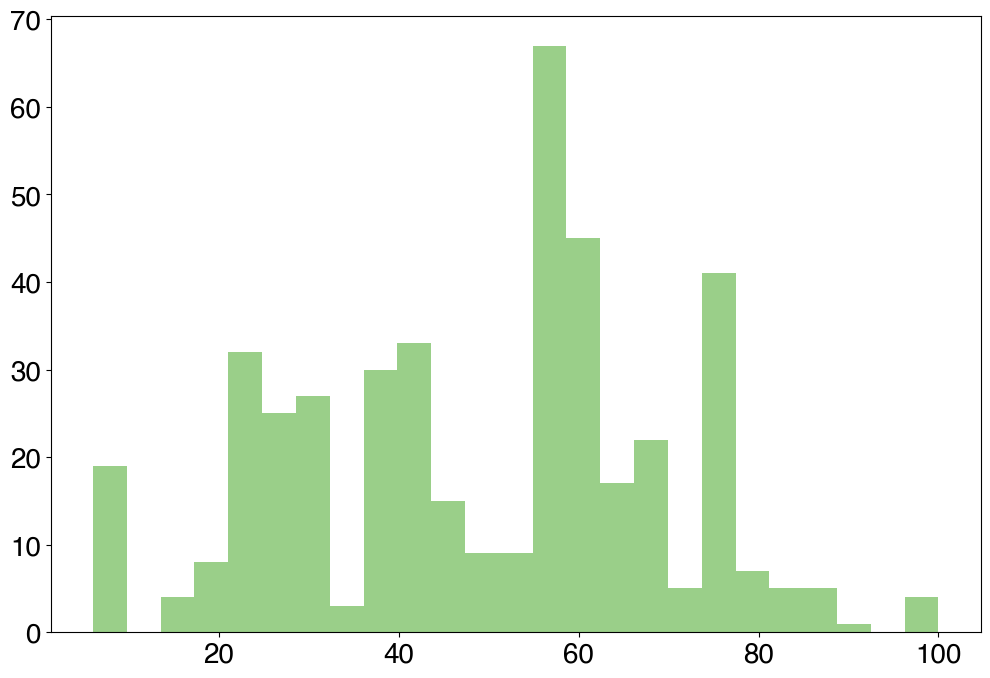

In [80]:
# Gradient ranges for interaction effect - Supporting Information Figure S1c.

plt.figure(figsize=(12, 8))
# plt.title("Landscape Complexity Ranges for Interaction Effect Observations")

plt.hist(
    lit_review_data.where(lit_review_data["interaction_effect"] == "NS")[
        "gradient_range"
    ],
    alpha=1,
    label="NS",
    bins=25,
    color="#9ACF89",
)

plt.hist(
    lit_review_data.where(lit_review_data["interaction_effect"] == "S")[
        "gradient_range"
    ],
    alpha=0.95,
    label="S",
    bins=25,
    color="#0B0405",
)

plt.legend(title="Effect", loc="upper right")
plt.xlabel("Landscape complexity range (%)")
plt.ylabel("Number of observations")
plt.show()


### Plots for interaction results

In [81]:
# Read interaction data. 

interaction_data = pd.read_csv("Data/Interaction_Analyses/lit_review_interactions.csv")
interaction_data.head()


,Obs_ID,Title,Author,Year,Response,Response Type,Response Category,Local Factor,Local Strategy,Local Effect,Landscape Gradient,Landscape Effect,Interaction Effect,Simple_Collapsed,Intermediate_Collapsed,Complex_Collapsed,Simple,Intermediate,Complex
0,Obs_1,Agricultural intensification and biodiversity ...,Flohre et al.,2011,Beta diversity (carabids),Biodiversity,Natural enemy,Agricultural intensification (low to high),Intensity,Negative,NaN,NS,More negative local effect in complex landscapes,NP,NP,NP,NS,Negative,NS
1,Obs_2,Agricultural landscape composition affects the...,Gervais et al.,2020,Pollen load diversity,Ecosystem Services,Pollinator,Local floral species richness,Floral,NS,0-24% non-intensive,NS,More positive local effect in complex landscapes,NP,Positive,Positive,Negative,Positive,Positive
2,Obs_3,"Agroecological farming, flowering phenology an...",Monticelli et al.,2022,Seed yield/plant C. segetum,Ecosystem Services,Crop,Local floral species richness,Floral,NS,5-34% semi-natural habitat,Positive,More positive local effect in complex landscapes,NP,Positive,Positive,NS,Positive,Positive
3,Obs_4,"Agroecological farming, flowering phenology an...",Monticelli et al.,2022,Pollinator abundance C. segetum,Biodiversity,Pollinator,Local floral species richness,Floral,Positive,5-34% semi-natural habitat,Negative,More positive local effect in simple landscapes,Positive,Positive,NP,Positive,Positive,Negative
4,Obs_5,"Agroecological farming, flowering phenology an...",Monticelli et al.,2022,Pollinator abundance C. jacea,Biodiversity,Pollinator,Local floral species richness,Floral,NS,5-34% semi-natural habitat,NS,More positive local effect in simple landscapes,Positive,NP,NP,Positive,Negative,Negative


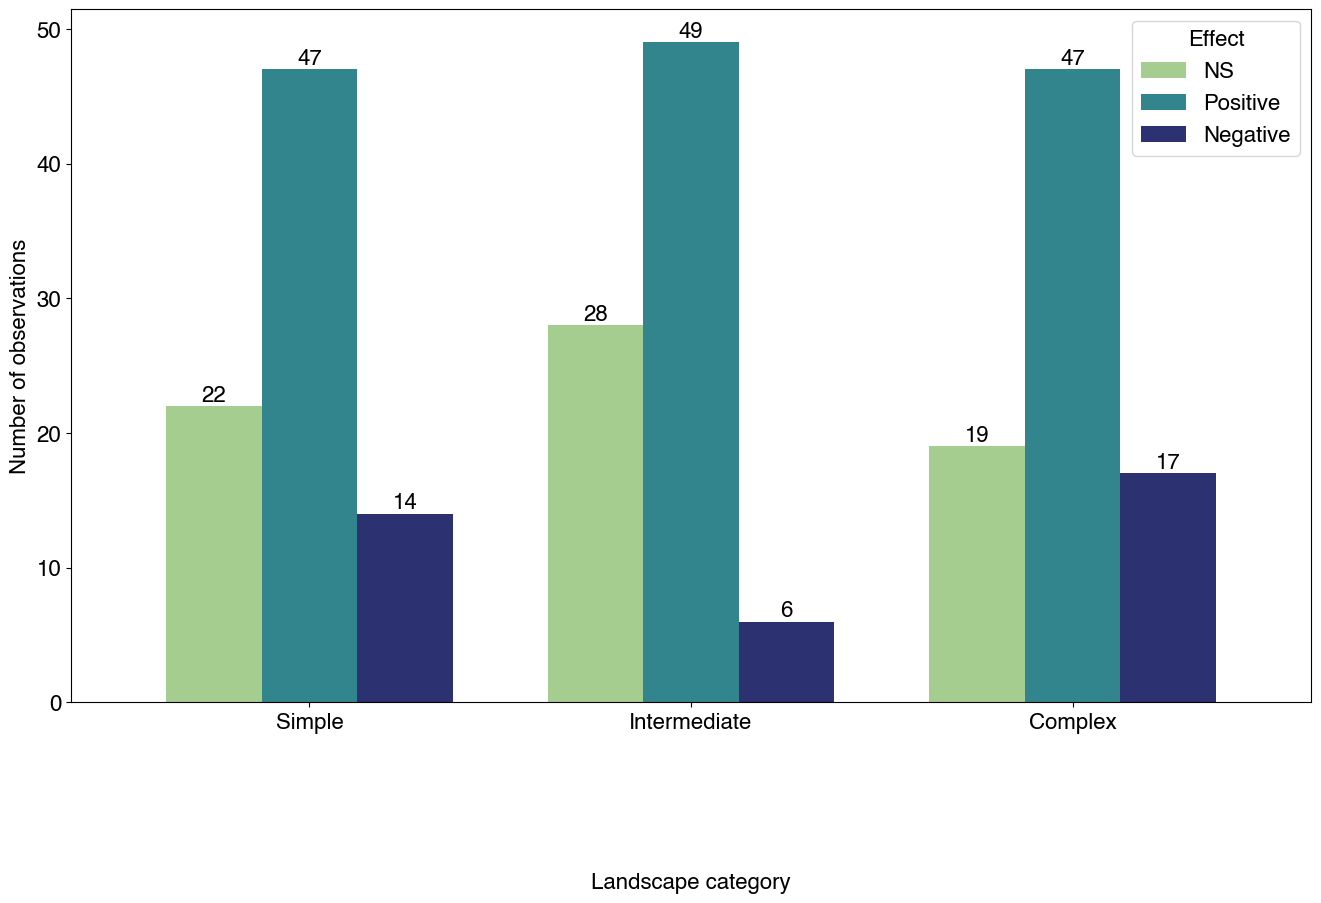

In [82]:
# Plot interaction responses to local management practices in different landscape categories - Figure 3c.

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 16})

ax11 = (
    interaction_data[["Simple", "Intermediate", "Complex"]]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .plot(
        kind="bar",
        colormap="crest",
        width=0.75,
        ylabel="Number of observations",
        xlabel="Landscape category",
        rot=0,
        figsize=(16, 9),
    )
)

ax11.xaxis.labelpad = 100

for container in ax11.containers:
    ax11.bar_label(container, fontsize=16)

ax11.legend(title="Effect")


In [83]:
all_interactions = (
    interaction_data[["Simple", "Intermediate", "Complex"]]
    .apply(pd.Series.value_counts)
    .T[["NS", "Positive", "Negative"]]
    .T
)

all_interactions


,Simple,Intermediate,Complex
NS,22,28,19
Positive,47,49,47
Negative,14,6,17


In [97]:
# Chi-squared test for interactions.

stats.chisquare(all_interactions)


Power_divergenceResult(statistic=array([21.42168675, 33.42168675, 20.3373494 ]), pvalue=array([2.23017954e-05, 5.52806238e-08, 3.83531192e-05]))

In [98]:
lit_review_data['interaction_effect'] = np.where(lit_review_data.interaction_effect != 'NS', 'S', lit_review_data.interaction_effect)


In [99]:
sig_interactions = lit_review_data.groupby("interaction_effect").count()["response"]
sig_interactions


interaction_effect
NS    497
S      84
Name: response, dtype: int64

(array([0, 1]), [Text(0, 0, 'NS'), Text(1, 0, 'S')])

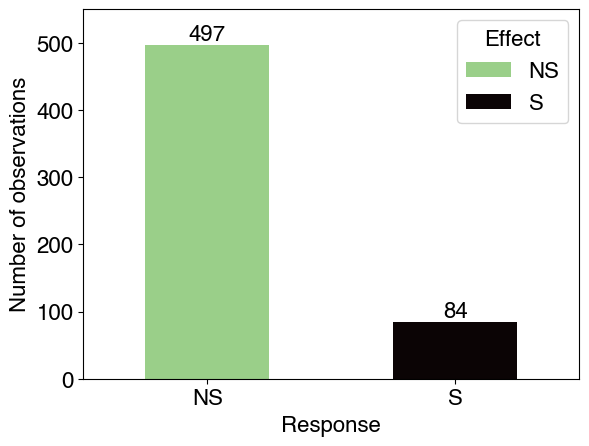

In [100]:
# Code for number of observations of significant and non-significant interactions - Figure 3a.

plt.rcParams["font.sans-serif"] = ["Helvetica"]
plt.rcParams.update({"font.size": 16})

ax = sig_interactions.plot.bar(color=["#9ACF89", "#0B0405"])

for container in ax.containers:
    ax.bar_label(container, fontsize=16)

handles = [
    Patch(facecolor="#9ACF89", label="NS"),
    Patch(facecolor="#0B0405", label="S"),
]

plt.legend(title="Effect", handles=handles)
ax.set_ylim(0, 550)
ax.set_xlabel("Response")
ax.set_ylabel("Number of observations")
plt.xticks(rotation=0)


In [101]:
interaction_data[["Simple", "Intermediate", "Complex"]].apply(pd.Series.value_counts).T[
    ["NS", "Positive", "Negative"]
]


,NS,Positive,Negative
Simple,22,47,14
Intermediate,28,49,6
Complex,19,47,17


Mean and standard deviations of minimum and maximum landscape complexity across all studies.

In [102]:
np.average(lit_review_data["minimum_complexity"].dropna())


11.221046511627906

In [103]:
np.std(lit_review_data["minimum_complexity"].dropna())


14.92555892990041

In [104]:
np.average(lit_review_data["maximum_complexity"].dropna())


60.38412790697675

In [105]:
np.std(lit_review_data["maximum_complexity"].dropna())


23.15230394832061

Recategorizing interaction results based on average landscape categories of included studies, original values defined in Tscharntke et al. 2012, and regional averages for Europe and North America.

### Recategorized Interactions

In [114]:
recat = pd.read_csv('Data/Interaction_Analyses/lit_review_recat_results.csv')
recat = clean_columns(recat)
recat = recat.merge(lit_review_data[['title', 'local_strategy']].drop_duplicates(), on='title', how='left')
recat = recat.drop(['author_s', 'year'], axis = 1)
recat = recat.melt(id_vars=["title", 'local_strategy'])
recat["landscape"] = recat["variable"].apply(lambda x: x.split("_")[0])
recat["response"] = recat["variable"].apply(lambda x: x.split("_")[1])
recat = recat.drop(['variable'], axis = 1)
recat = recat.loc[recat['value'] != 0]
recat = recat.drop(['value'], axis = 1)

recat.head()

,title,local_strategy,landscape,response
14,Benefits of wildflower areas as overwintering ...,Floral,simple,pos
16,Benefits of wildflower areas as overwintering ...,Floral,simple,pos
18,Benefits of wildflower areas as overwintering ...,Floral,simple,pos
22,Different components of landscape complexity a...,Intensity,simple,pos
23,Different components of landscape complexity a...,Intensity,simple,pos


In [115]:
recat.to_csv('Data/Interaction_Analyses/lit_review_recat_for_analysis.csv')

### Recategorized Interactions (Europe)

In [118]:
recat_europe = pd.read_csv('Data/Interaction_Analyses/lit_review_recat_europe_results.csv')
recat_europe = clean_columns(recat_europe)
recat_europe = recat_europe.merge(lit_review_data[['title', 'local_strategy']].drop_duplicates(), on='title', how='left')
recat_europe = recat_europe.drop(['author_s', 'year'], axis = 1)
recat_europe = recat_europe.melt(id_vars=["title", 'local_strategy'])
recat_europe["landscape"] = recat_europe["variable"].apply(lambda x: x.split("_")[0])
recat_europe["response"] = recat_europe["variable"].apply(lambda x: x.split("_")[1])
recat_europe = recat_europe.drop(['variable'], axis = 1)
recat_europe = recat_europe.loc[recat_europe['value'] != 0]
recat_europe = recat_europe.drop(['value'], axis = 1)

recat_europe.head()

,title,local_strategy,landscape,response
7,Benefits of wildflower areas as overwintering ...,Floral,simple,pos
9,Benefits of wildflower areas as overwintering ...,Floral,simple,pos
11,Benefits of wildflower areas as overwintering ...,Floral,simple,pos
15,Different components of landscape complexity a...,Intensity,simple,pos
16,Different components of landscape complexity a...,Intensity,simple,pos


In [119]:
recat_europe.to_csv('Data/Interaction_Analyses/lit_review_recat_europe_for_analysis.csv')

# Recategorized Interactions (North America)

In [120]:
recat_na = pd.read_csv('Data/Interaction_Analyses/lit_review_recat_na_results.csv')
recat_na = clean_columns(recat_na)
recat_na = recat_na.merge(lit_review_data[['title', 'local_strategy']].drop_duplicates(), on='title', how='left')
recat_na = recat_na.drop(['author_s', 'year'], axis = 1)
recat_na = recat_na.melt(id_vars=["title", 'local_strategy'])
recat_na["landscape"] = recat_na["variable"].apply(lambda x: x.split("_")[0])
recat_na["response"] = recat_na["variable"].apply(lambda x: x.split("_")[1])
recat_na = recat_na.drop(['variable'], axis = 1)
recat_na = recat_na.loc[recat_na['value'] != 0]
recat_na = recat_na.drop(['value'], axis = 1)

recat_na.head()

,title,local_strategy,landscape,response
5,Landscape context shifts the balance of costs ...,Floral,simple,pos
6,Diverse landscapes but not wildflower planting...,Floral,simple,pos
8,Negative effects of pesticides on wild bee com...,Intensity,simple,pos
9,Negative effects of pesticides on wild bee com...,Intensity,simple,pos
12,Local and broadscale landscape structure diffe...,Structure,simple,pos


In [121]:
recat_na.to_csv('Data/Interaction_Analyses/lit_review_recat_na_for_analysis.csv')